# 機器學習導論 (Introduction to Machine Learning)
### 本檔案示範了線性回歸、邏輯回歸、K近鄰演算法(KNN)、決策樹與隨機森林等多種機器學習演算法的實作。內容涵蓋資料切分、模型訓練、預測與準確率評估，並以 Python 的 scikit-learn 套件為工具，提供詳細註解說明。透過本檔案，學習者可打好基礎，為後續進階機器學習課程做好準備。

In [1]:
# 匯入pandas套件，用於資料操作與分析
import pandas as pd

# 匯入matplotlib.pyplot模組，用於繪製圖表
import matplotlib.pyplot as plt

# 從sklearn.model_selection模組匯入train_test_split函數，用於將資料集切分為訓練集與測試集
from sklearn.model_selection import train_test_split

# 從sklearn.linear_model模組匯入LinearRegression類別，用於建立線性迴歸模型
from sklearn.linear_model import LinearRegression

# 從sklearn.metrics模組匯入mean_squared_error函數，用於計算預測結果的均方誤差(MSE)
from sklearn.metrics import mean_squared_error

In [2]:
# 讀取名為data.csv的CSV檔案，用於將資料載入到DataFrame物件df中
df = pd.read_csv("data.csv")

# 顯示DataFrame df的內容，用於檢視讀取的資料
df

,Height,Weight
0,162,50
1,160,48
2,175,61
3,154,44
4,162,55
5,158,47
6,162,50
7,169,60
8,180,68
9,170,65


In [3]:
# 從DataFrame df中刪除'Weight'欄位，用於取得特徵變數X(即模型的輸入資料)
# axis = 1表示刪除欄(columns)，若是axis = 0則是刪除列(rows)
X = df.drop('Weight', axis = 1)

# 將DataFrame df中的'Weight'欄位取出，用於當作目標變數y(即模型的預測目標)
y = df['Weight']

In [4]:
# 使用train_test_split函數，將特徵變數X和目標變數y切分為訓練集和測試集
# test_size = 0.2：表示測試集佔20%
# random_state = 0：用於設定隨機種子，確保切分結果可重現

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 輸出訓練集特徵資料的維度(列數和欄數)，用於確認資料切分是否正確
print("訓練集的維度:", X_train.shape)

# 輸出測試集特徵資料的維度(列數和欄數)，用於確認資料切分是否正確
print("測試集的維度:", X_test.shape)

訓練集的維度: (20, 1)
測試集的維度: (5, 1)


In [5]:
# 建立線性迴歸模型，用於預測目標變數與特徵變數之間的線性關係
model = LinearRegression()

# 使用訓練集資料(X_train和y_train)訓練模型，用於學習特徵與目標的對應關係
model.fit(X_train, y_train)

# 輸出模型的係數(Coefficient)，用於表示每個特徵對目標變數的影響權重
print("係數(Coefficient):", model.coef_)

# 輸出模型的截距(Intercept)，用於表示當所有特徵為零時的預測值
print("截距(Intercept):", model.intercept_)

係數(Coefficient): [0.98547467]
截距(Intercept): -107.78516340999484


In [6]:
# 使用訓練好的模型對測試集特徵資料X_test進行預測，用於產生預測結果y_pred
y_pred = model.predict(X_test)

# 使用mean_squared_error函數計算實際值y_test與預測值y_pred之間的均方誤差(MSE)，用於評估模型的預測準確度
MSE = mean_squared_error(y_test, y_pred)

# 輸出均方誤差(MSE)，數值越小代表模型預測越準確
print("MSE:", MSE)

MSE: 4.6560570179387195


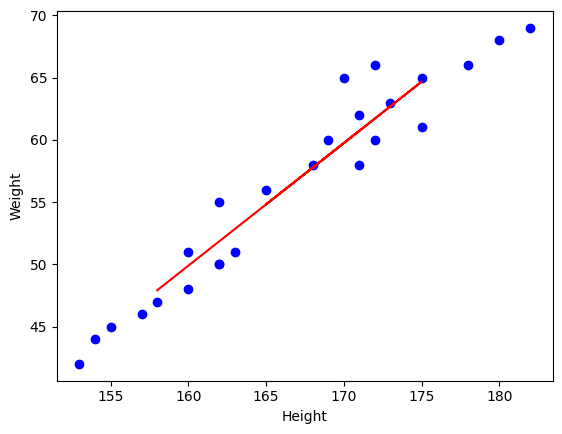

In [7]:
# 繪製散佈圖，用於顯示原始資料中每筆身高(Height)與體重(Weight)之間的關係
plt.scatter(X, y, color="blue")

# 繪製線性迴歸模型在測試集上的預測結果，用於視覺化模型擬合出的迴歸線
plt.plot(X_test, y_pred, color="red")

# 設定X軸標籤為"Height"
plt.xlabel("Height")

# 設定Y軸標籤為"Weight"
plt.ylabel("Weight")

# 顯示圖表
plt.show()

In [8]:
# 匯入pandas套件，用於資料操作與分析
import pandas as pd

# 匯入sklearn的內建資料集模組，用於載入範例資料
from sklearn import datasets

# 從sklearn.model_selection模組匯入train_test_split函數，用於將資料集切分為訓練集與測試集
from sklearn.model_selection import train_test_split

# 從sklearn.preprocessing模組匯入StandardScaler類別，用於標準化特徵資料(轉換為平均值為0、標準差為1)
from sklearn.preprocessing import StandardScaler

# 從sklearn.linear_model模組匯入LinearRegression類別，用於建立線性迴歸模型
from sklearn.linear_model import LogisticRegression

In [9]:
# 載入sklearn內建的鳶尾花(Iris)資料集
iris = datasets.load_iris()

# 將特徵資料轉換成DataFrame，並指定欄位名稱為iris.feature_names
# iris.data是花的4個特徵(sepal length, sepal width, petal length, petal width)

X = pd.DataFrame(iris.data, columns = iris.feature_names)

# 將目標資料(花的種類)轉換成DataFrame，欄位名稱為'target'
# iris.target包含0, 1, 2這三個數字，分別對應三種鳶尾花

y = pd.DataFrame(iris.target, columns = ['target'])

# 將特徵X和標籤y合併成一個完整的資料集iris
# axis = 1表示水平合併(欄位相連)

iris = pd.concat([X, y], axis = 1)

# 顯示合併後的DataFrame，包含四個特徵與一個目標欄位
print(iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [10]:
# 選取需要的三個欄位：花萼長度(sepal length)、花瓣長度(petal length)與目標欄位(target)
iris = iris[['sepal length (cm)', 'petal length (cm)', 'target']]

# 過濾資料，只保留目標變數為0或1的樣本(即只保留兩類資料，用於二元分類)
iris = iris[iris['target'].isin([0, 1])]

# 顯示處理後的資料集
print(iris)

    sepal length (cm)  petal length (cm)  target
0                 5.1                1.4       0
1                 4.9                1.4       0
2                 4.7                1.3       0
3                 4.6                1.5       0
4                 5.0                1.4       0
..                ...                ...     ...
95                5.7                4.2       1
96                5.7                4.2       1
97                6.2                4.3       1
98                5.1                3.0       1
99                5.7                4.1       1

[100 rows x 3 columns]


In [11]:
# 從iris資料集中取出特徵欄位：花萼長度與花瓣長度，用於模型訓練的輸入變數X
X = iris[['sepal length (cm)', 'petal length (cm)']]

# 從iris資料集中取出目標欄位target，用於模型訓練的預測目標變數y
y = iris[['target']]

# 使用train_test_split函數，將特徵變數X和目標變數y切分為訓練集和測試集
# test_size = 0.3：表示測試集佔30%
# random_state = 0：用於設定隨機種子，確保切分結果可重現

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 輸出訓練集特徵資料的維度(列數和欄數)，用於確認資料切分是否正確
print("訓練集的維度:", X_train.shape)

# 輸出測試集特徵資料的維度(列數和欄數)，用於確認資料切分是否正確
print("測試集的維度:", X_test.shape)

訓練集的維度: (70, 2)
測試集的維度: (30, 2)


In [12]:
# 建立一個標準化工具，準備對資料做標準化處理
scaler = StandardScaler()

# 對訓練集X_train進行標準化，先計算訓練集的平均值與標準差，再轉換資料(轉換後平均為0、標準差為1)
X_train_std = scaler.fit_transform(X_train)

# 對測試集X_test進行標準化，使用訓練集的平均值和標準差來轉換資料
X_test_std = scaler.transform(X_test)

In [13]:
# 建立邏輯迴歸模型物件
model = LogisticRegression()

# 使用標準化後的訓練特徵資料X_train_std與目標變數y_train來訓練模型
# y_train['target']：因為y_train是DataFrame，取出'target'欄位當作一維的目標陣列

model.fit(X_train_std, y_train['target'])

LogisticRegression()

In [14]:
# 使用訓練好的模型對標準化後的測試集特徵資料進行預測
y_pred = model.predict(X_test_std)

# 輸出測試集的實際目標值(轉成一維陣列，方便閱讀)
print('目標值:', y_test['target'].values)

# 輸出模型預測的結果
print('預測值:', y_pred)

# 計算並輸出模型在測試集上的準確率(accuracy)
print('準確率:', model.score(X_test_std, y_test))

目標值: [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1]
預測值: [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1]
準確率: 1.0


C:\Users\hankc\AppData\Local\Temp\ipykernel_14524\1504562311.py:73: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x = p[:, 0], y = p[:, 1], c = cmap(i), marker = markers[i], label = t)


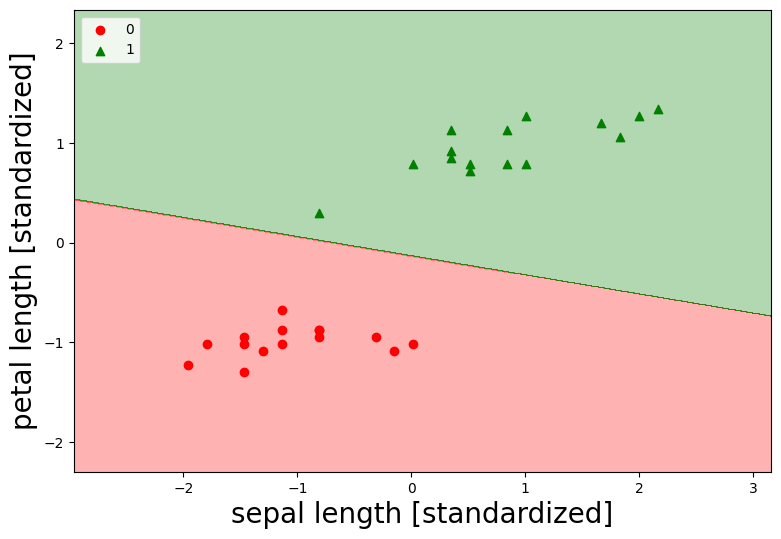

In [15]:
# 匯入numpy套件，用於數值計算與陣列處理
import numpy as np

# 從matplotlib.colors模組中匯入ListedColormap函數，用來建立自訂的顏色對映表(分類顏色用)
from matplotlib.colors import ListedColormap

# 將標準化後的測試資料X_test_std指定為特徵變數X(只使用前兩個特徵欄位，例如：sepal length與petal length)
X = X_test_std

# 從y_test中取得目標欄位(類別標籤)，並轉換為NumPy陣列
y = y_test['target'].values

# 定義每個類別對應的資料點形狀
# 'o'：圓形，代表類別0
# '^'：三角形，代表類別1

markers = ('o', '^')

# 定義每個類別對應的顏色
# 'red'：紅色，代表類別0
# 'green'：綠色，代表類別1

colors = ('red', 'green')

# 建立顏色映射表，根據實際類別數決定使用幾種顏色
# len(np.unique(y))：取得y中不重複類別的數量
# 從colors陣列中取前面n種顏色，其中n即為類別數

cmap = ListedColormap(colors[:len(np.unique(y))])

# 取得特徵矩陣X第1欄(第1個特徵)所有資料，計算最小值減1與最大值加1，作為X軸範圍
x0min, x0max = X[:, 0].min() - 1, X[:, 0].max() + 1

# 取得特徵矩陣X第2欄(第2個特徵)所有資料，計算最小值減1與最大值加1，作為Y軸範圍
x1min, x1max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 在特徵空間中產生網格座標，用於繪製決策邊界圖
# np.meshgrid：將兩個一維座標陣列組合成二維網格座標矩陣a與b
# np.arange(x0min, x0max, 0.01)：表示從x0min到x0max，以0.01為間隔產生座標點

a, b = np.meshgrid(np.arange(x0min, x0max, 0.01), np.arange(x1min, x1max, 0.01))

# 將網格點展平(使用ravel()函式將多維陣列轉成一維陣列)，並組合成模型可接受的輸入格式(每列為一個點的兩個特徵)
# 使用轉置(.T)將特徵陣列調整為每列一筆樣本，每欄一個特徵
# 使用訓練好的模型進行分類預測

Z = model.predict(np.array([a.ravel(), b.ravel()]).T)

# 將預測結果重新排列成網格形狀，方便後續繪圖
Z = Z.reshape(a.shape)

# 建立圖形視窗，設定大小為9x6英吋
plt.figure(figsize = (9, 6))

# 利用預測結果繪製分類決策邊界的等高線填色圖
# alpha：透明度，0.3表示淡化顏色
# cmap：使用先前定義的顏色映射表

plt.contourf(a, b, Z, alpha = 0.3, cmap = cmap)

# 設定X與Y軸顯示範圍，與網格座標範圍相同
plt.xlim(a.min(), a.max())
plt.ylim(b.min(), b.max())

# 依序取得每個類別的索引(i)與類別標籤(t)，並從X中選出屬於該類別的資料點p
# 使用plt.scatter()函式繪製資料點，顏色與標記由cmap和markers指定
# c：點的顏色，由cmap(i)根據類別決定
# marker：點的形狀，由markers陣列指定
# label：圖例標籤，顯示類別名稱

for i, t in enumerate(np.unique(y)):
    p = X[y == t]
    plt.scatter(x = p[:, 0], y = p[:, 1], c = cmap(i), marker = markers[i], label = t)

# 設定X軸標籤為'sepal length [standardized]'，字型大小為20
plt.xlabel('sepal length [standardized]', size = 20)

# 設定Y軸標籤為'petal length [standardized]'，字型大小為20
plt.ylabel('petal length [standardized]', size = 20)

# 顯示圖例，位置設定在左上角
plt.legend(loc='upper left')

# 顯示圖表
plt.show()

In [16]:
# 匯入sklearn的內建資料集模組，用於載入範例資料
from sklearn import datasets

# 從sklearn.model_selection模組匯入train_test_split函數，用於將資料集切分為訓練集與測試集
from sklearn.model_selection import train_test_split

# 從sklearn.neighbors模組匯入KNeighborsClassifier類別，用於建立K近鄰分類模型
from sklearn.neighbors import KNeighborsClassifier

# 匯入sklearn的metrics模組，用於計算模型評估指標
from sklearn import metrics

# 匯入matplotlib.pyplot模組，用於繪製圖表
import matplotlib.pyplot as plt

In [17]:
# 載入sklearn內建的iris(鳶尾花)資料集
iris = datasets.load_iris()

# 將特徵資料轉成NumPy陣列
X = iris.data

# 將目標資料(種類標籤)轉成NumPy陣列
y = iris.target

# 輸出特徵資料X
print(X)

# 輸出目標資料y
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [18]:
# 使用train_test_split函數，將特徵變數X和目標變數y切分為訓練集和測試集
# test_size = 0.3：表示測試集佔30%
# random_state = 0：用於設定隨機種子，確保切分結果可重現

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 輸出訓練集特徵資料的維度(列數和欄數)，用於確認資料切分是否正確
print("訓練集的維度:", X_train.shape)

# 輸出測試集特徵資料的維度(列數和欄數)，用於確認資料切分是否正確
print("測試集的維度:", X_test.shape)

訓練集的維度: (105, 4)
測試集的維度: (45, 4)


In [19]:
# 建立KNN分類器，設定鄰居數為3(即根據最近3個鄰居進行分類判斷)
model = KNeighborsClassifier(n_neighbors = 3)

# 使用訓練資料(X_train, y_train)來訓練KNN模型
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
# 使用訓練好的模型對測試集特徵資料進行預測
y_pred = model.predict(X_test)

# 輸出測試集的實際目標值
print('目標值:', y_test)

# 輸出模型的預測結果
print('預測值:', y_pred)

# 計算並輸出模型在測試集上的準確率
print('準確率:', model.score(X_test, y_test))

目標值: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
預測值: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
準確率: 0.9777777777777777


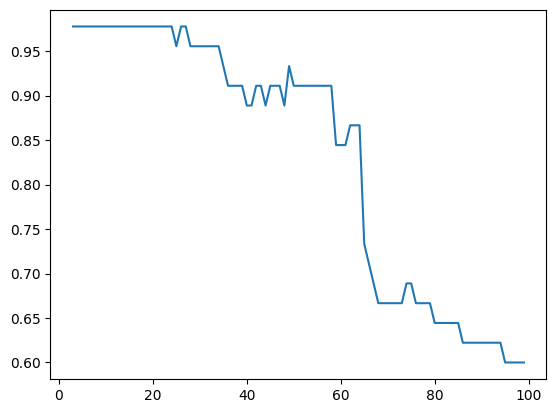

In [21]:
# 建立一個空串列，用於儲存每個K值對應的模型準確率
accuracy = []

# 依序測試K值從3到99(不含100)
for K in range(3, 100):
    # 建立KNN模型，設定當前的鄰居數為K(即根據最近K個鄰居進行分類判斷)
    model = KNeighborsClassifier(n_neighbors = K)
    
    # 使用訓練資料訓練模型
    model.fit(X_train, y_train)
    
    # 對測試集進行預測
    y_pred = model.predict(X_test)
    
    # 計算預測結果的準確率並加入accuracy串列中
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

# 建立K值的範圍，用於繪圖(對應accuracy)
K = range(3, 100)

# 繪製K值與模型準確率的折線圖(x軸為K，y軸為accuracy)
plt.plot(K, accuracy)

# 顯示圖表
plt.show()

In [22]:
# 匯入sklearn的內建資料集模組，用於載入範例資料
from sklearn import datasets

# 從sklearn.model_selection模組匯入train_test_split函數，用於將資料集切分為訓練集與測試集
from sklearn.model_selection import train_test_split

# 從sklearn.tree模組匯入DecisionTreeClassifier類別，用於建立決策樹分類模型
from sklearn.tree import DecisionTreeClassifier

In [23]:
# 載入sklearn內建的iris(鳶尾花)資料集
iris = datasets.load_iris()

# 將特徵資料轉成NumPy陣列
X = iris.data

# 將目標資料(種類標籤)轉成NumPy陣列
y = iris.target

In [24]:
# 使用train_test_split函數，將特徵變數X和目標變數y切分為訓練集和測試集
# test_size = 0.3：表示測試集佔30%
# random_state = 0：用於設定隨機種子，確保切分結果可重現

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
# 建立決策樹模型物件
model = DecisionTreeClassifier()

# 使用訓練資料(X_train, y_train)來訓練決策樹模型
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
# 使用訓練好的模型對測試集特徵資料進行預測
y_pred = model.predict(X_test)

# 輸出測試集的實際目標值
print('目標值:', y_test)

# 輸出模型的預測結果
print('預測值:', y_pred)

# 計算並輸出模型在測試集上的準確率
print('準確率:', model.score(X_test, y_test))

目標值: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
預測值: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
準確率: 0.9777777777777777


In [27]:
# 匯入sklearn的內建資料集模組，用於載入範例資料
from sklearn import datasets

# 從sklearn.model_selection模組匯入train_test_split函數，用於將資料集切分為訓練集與測試集
from sklearn.model_selection import train_test_split

# 從sklearn.ensemble模組匯入RandomForestClassifier類別，用於建立隨機森林分類模型
from sklearn.ensemble import RandomForestClassifier

In [28]:
# 載入sklearn內建的iris(鳶尾花)資料集
iris = datasets.load_iris()

# 將特徵資料轉成NumPy陣列
X = iris.data

# 將目標資料(種類標籤)轉成NumPy陣列
y = iris.target

In [29]:
# 使用train_test_split函數，將特徵變數X和目標變數y切分為訓練集和測試集
# test_size = 0.3：表示測試集佔30%
# random_state = 0：用於設定隨機種子，確保切分結果可重現

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
# 建立隨機森林模型物件
model = RandomForestClassifier()

# 使用訓練資料(X_train, y_train)來訓練隨機森林模型
model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# 使用訓練好的模型對測試集特徵資料進行預測
y_pred = model.predict(X_test)

# 輸出測試集的實際目標值
print('目標值:', y_test)

# 輸出模型的預測結果
print('預測值:', y_pred)

# 計算並輸出模型在測試集上的準確率
print('準確率:', model.score(X_test, y_test))

目標值: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
預測值: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
準確率: 0.9777777777777777


In [32]:
# 匯入sklearn的內建資料集模組，用於載入範例資料
from sklearn import datasets

# 從sklearn.model_selection模組匯入train_test_split函數，用於將資料集切分為訓練集與測試集
from sklearn.model_selection import train_test_split

# 從sklearn.neighbors模組匯入KNeighborsClassifier類別，用於建立K近鄰分類模型
from sklearn.neighbors import KNeighborsClassifier

# 匯入sklearn的metrics模組，用於計算模型評估指標
from sklearn import metrics

In [33]:
# 載入sklearn內建的breast cancer(乳腺癌)資料集
cancer = datasets.load_breast_cancer()

# 顯示特徵資料的維度(樣本數, 特徵數)
# cancer.data：所有樣本的特徵資料(2維陣列)
# .shape：傳回陣列的維度(為一個tuple，例如(569, 30)表示有569筆資料，每筆有30個特徵)

print(cancer.data.shape)

# 顯示第0筆樣本的所有特徵值
# cancer.data[0]：第0筆樣本的30個特徵數值(以一維陣列表示)
print(cancer.data[0])

# 顯示前20筆樣本的目標值(分類標籤)
# cancer.target：每筆資料的分類標籤(0：惡性，1：良性)
# [0:20]：取出第0到第19筆的標籤值(共20筆)
print(cancer.target[0:20])

(569, 30)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [34]:
# 使用train_test_split函數，將特徵變數X和目標變數y切分為訓練集和測試集
# test_size = 0.2：表示測試集佔20%
# random_state = 0：用於設定隨機種子，確保切分結果可重現

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 0)

# 輸出訓練集特徵資料的維度(列數和欄數)，用於確認資料切分是否正確
print("訓練集的維度:", X_train.shape)

# 輸出測試集特徵資料的維度(列數和欄數)，用於確認資料切分是否正確
print("測試集的維度:", X_test.shape)

訓練集的維度: (455, 30)
測試集的維度: (114, 30)


In [35]:
# 建立第一個KNN分類器，設定鄰居數為1(即根據最近1個鄰居進行分類判斷)
knn1 = KNeighborsClassifier(n_neighbors = 1)

# 使用訓練資料(X_train, y_train)來訓練K = 1的KNN模型
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
# 建立第二個KNN分類器，設定鄰居數為5(即根據最近5個鄰居進行分類判斷)
knn5 = KNeighborsClassifier(n_neighbors = 5)

# 使用訓練資料(X_train, y_train)來訓練K = 5的KNN模型
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
# 建立第三個KNN分類器，設定鄰居數為10(即根據最近10個鄰居進行分類判斷)
knn10 = KNeighborsClassifier(n_neighbors = 10)

# 使用訓練資料(X_train, y_train)來訓練K = 10的KNN模型
knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [38]:
# 使用訓練好的第一個KNN模型(knn1)對測試集特徵資料進行預測
y_pred1 = knn1.predict(X_test)

# 輸出測試集的實際目標值
print('目標值:', y_test)

# 輸出knn1模型的預測結果
print('預測值:', y_pred1)

# 計算並輸出knn1模型在測試集上的準確率
print('準確率:', knn1.score(X_test, y_test))

目標值: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]
預測值: [1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1]
準確率: 0.9122807017543859


In [39]:
# 使用訓練好的第二個KNN模型(knn5)對測試集特徵資料進行預測
y_pred5 = knn5.predict(X_test)

# 輸出測試集的實際目標值
print('目標值:', y_test)

# 輸出knn5模型的預測結果
print('預測值:', y_pred5)

# 計算並輸出knn5模型在測試集上的準確率
print('準確率:', knn5.score(X_test, y_test))

目標值: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]
預測值: [0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]
準確率: 0.9385964912280702


In [40]:
# 使用訓練好的第三個KNN模型(knn10)對測試集特徵資料進行預測
y_pred10 = knn10.predict(X_test)

# 輸出測試集的實際目標值
print('目標值:', y_test)

# 輸出knn10模型的預測結果
print('預測值:', y_pred10)

# 計算並輸出knn10模型在測試集上的準確率
print('準確率:', knn10.score(X_test, y_test))

目標值: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]
預測值: [0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]
準確率: 0.9473684210526315
